### Problem Statement

You have just been hired as a data analyst for a supermarket with branches located in 3 major cities in Nigeria. Each branch has been recording sales information for the past 3 months. The company is interested in understanding how well the business has fared across the 3 branches, identify risks and areas of improvements. 

### Objective

- Get the sales data for each branch

- Examine and profile the data 

- Prepare the data for visualization

- Visualize the data and identify key insights and recommendations

### Approach

To achieve this, we are going to approach the analysis using the CRISP-DM (Cross-Industry Standard Process for Data Mining) Framework  

- Properly understand the business and data

- Prepare the data for analysis

-  Answer questions to help us achieve our objectives

- Draw conclusions

- Prepare a summary 

#### 1. Data Understanding/Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
# read in all the datasets

lagos_df = pd.read_csv('datasets/Lagos_Branch.csv')
abuja_df = pd.read_csv('datasets/Abuja_Branch.csv')
ph_df = pd.read_csv('datasets/Port_Harcourt_Branch.csv')

In [4]:
lagos_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [5]:
abuja_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [6]:
# we want to work on the datasets as a whole so we concatenate the data for each branch

comb_df = pd.concat([lagos_df, abuja_df, ph_df], ignore_index = True) 

In [7]:
comb_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [8]:
comb_df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9
999,233-67-5758,C,Port Harcourt,Normal,Male,Health and beauty,14526.0,1,726.30,15252.30,1/29/2019,13:46,Epay,14526.0,4.761905,726.30,6.2


In [9]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Todo

- We would not need the invoice ID column because it doesn't help us answer the questions we are interested in

- We would need to rename Payment to Payment Type, City to Branch Location, cogs to Items Cost, total to Items Selling Price  so that it passes a clear message

- We would need to convert date and time column to a proper data type

In [10]:
comb_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
comb_df.shape

(1000, 17)

In [13]:
## Categorize the columns into categorical and numerical

cat_columns = [i for i in comb_df.select_dtypes(include=['object']).columns]
num_columns = [i for i in comb_df.select_dtypes(include=['int64', 'float64']).columns]

In [14]:
print(cat_columns)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [15]:
print(num_columns)

['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [16]:
# summary stats of the data
comb_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


Selecting/Indexing DataFrames

Filtering Pandas DataFrames - Unrelated to the Exercise

In [ ]:
cash_df = comb_df[comb_df['Payment'] == 'Cash']

cash_df = cash_df.query("Payment == Cash")
                        
# combining multiple conditions

cash_df = cash_df.query("Payment == 'Cash' and Branch == 'Lagos'")

- We need to confirm the data distribution with a plot

- gross margin percentage is a scalar - 4.76

- Looks like there are data inconsistencies

- rating values range from a min of 4 to max of 10. We can categorize it for easier analysis

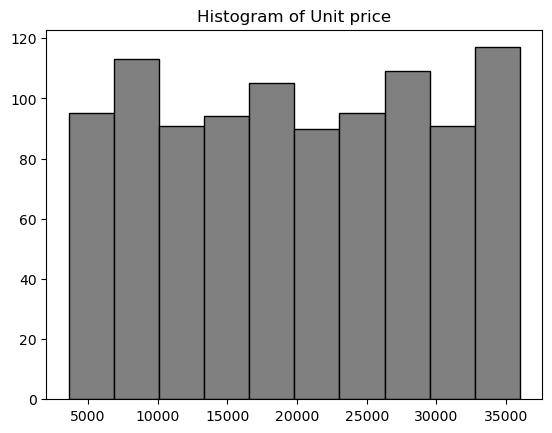

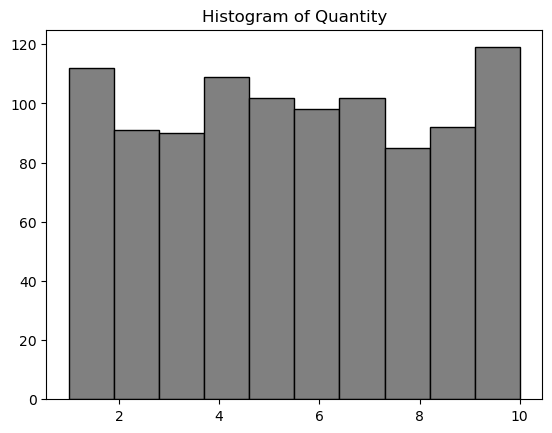

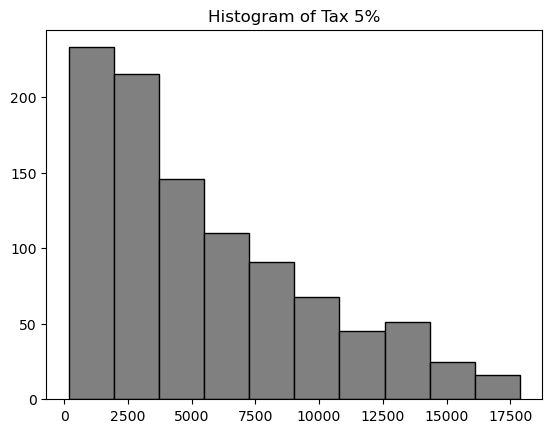

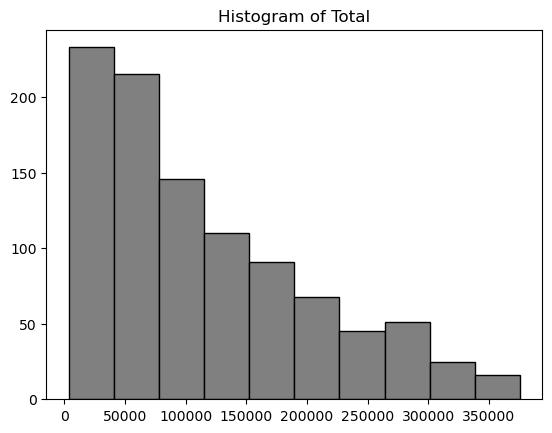

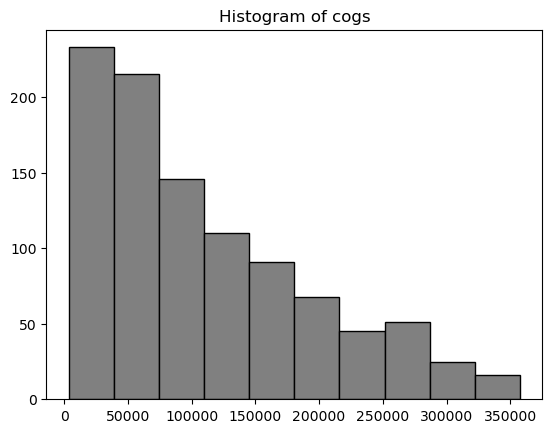

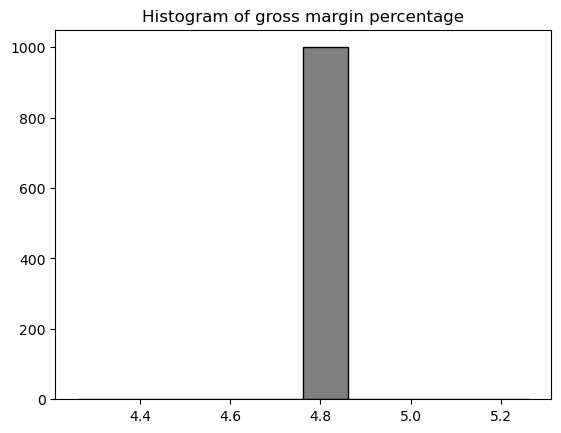

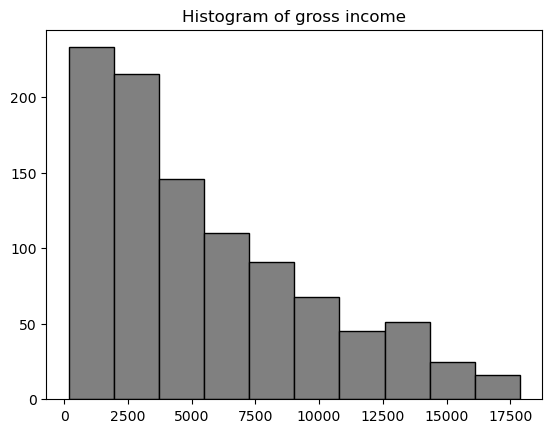

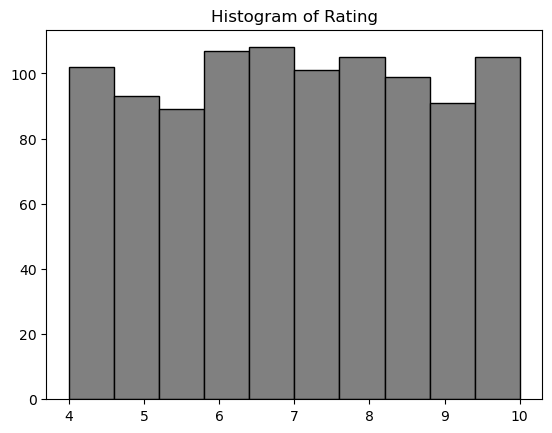

In [17]:
# Density/histogram plot of each numerical column

for column in num_columns:
    plt.hist(comb_df[column], color='grey', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

- Rating, Unit Price and Quantity show a distribution that is almost uniform indicating that all values are equally likely. 

- Tax, Total cogs and gross income show a distribution that is right skewed indicating that outliers i.e fewer records of high tax, total, cogs and gross income

- The distribution help us explain the outcome of our analysis

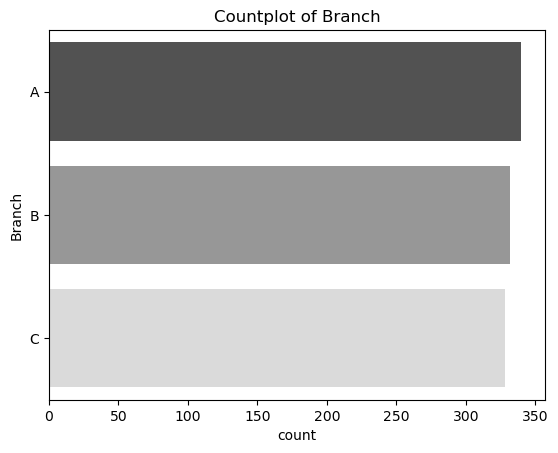

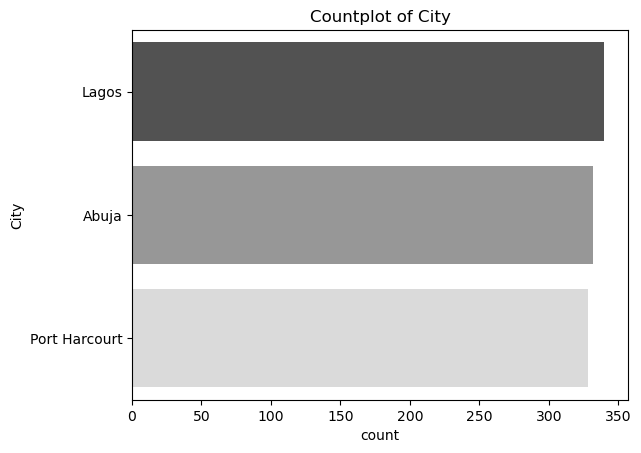

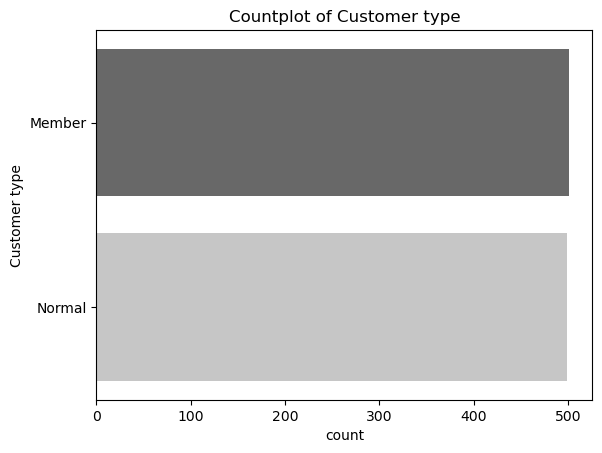

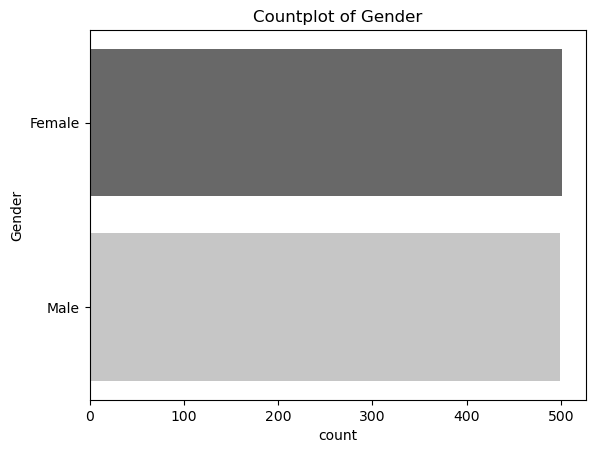

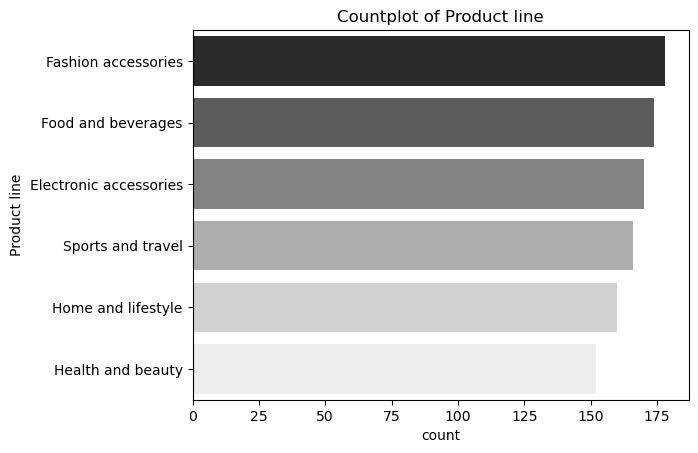

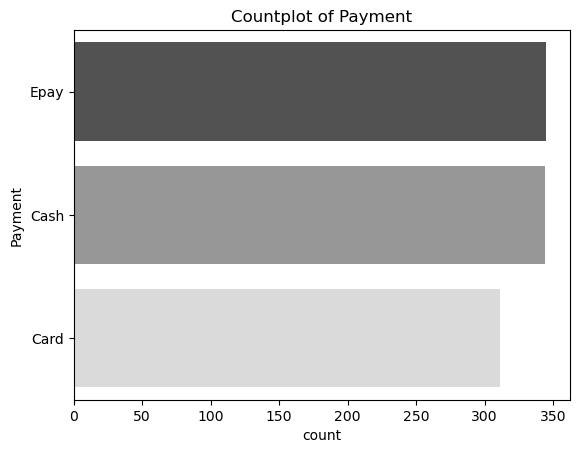

In [35]:
## Distribution of values for categorical data

## remove Novice ID 
# cat_columns.remove('Invoice ID')
# cat_columns.remove('Date')
# cat_columns.remove('Time')


for column in cat_columns:
    sorted_categories = comb_df[column].value_counts().index
    sb.countplot(y=column, data=comb_df, order=sorted_categories, palette='Greys_r') 
    plt.title(f'Countplot of {column}')
    plt.show()

 Some of the categories have count values that are close to each other, let's use the value counts method to better see the difference

In [46]:

for col in cat_columns:
    print((comb_df[col].value_counts().sort_values(ascending=False)/len(comb_df)) * 100)
    print('-----------------------')

Branch
A    34.0
B    33.2
C    32.8
Name: count, dtype: float64
-----------------------
City
Lagos            34.0
Abuja            33.2
Port Harcourt    32.8
Name: count, dtype: float64
-----------------------
Customer type
Member    50.1
Normal    49.9
Name: count, dtype: float64
-----------------------
Gender
Female    50.1
Male      49.9
Name: count, dtype: float64
-----------------------
Product line
Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: count, dtype: float64
-----------------------
Payment
Epay    34.5
Cash    34.4
Card    31.1
Name: count, dtype: float64
-----------------------


The categories show similar frequency for each categorical data

#### Data Cleaning/Wrangling


- Duplicate values

- Null values

- Incorrect data/ data types

- Remove Unwanted Columns

- Rename columns

- Outliers

- other inconsistencies found during data exploration

In [47]:
comb_df.duplicated().sum()

0

In [48]:
comb_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [49]:
# check data type of columns
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [50]:
# create a copy of the data before we commence munging

comb_df_copy = comb_df.copy()

In [51]:
# drop unnecessary columns

comb_df.drop('Invoice ID', axis=1 ,inplace=True)

In [52]:
comb_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [53]:
# rename columns 
# Payment to Payment Type, City to Branch Location, cogs to Items Cost, total to Items Selling Price 

comb_df.rename(columns= 
               {'Payment' : 'Payment Type', 
                'City' : 'Branch Location', 'cogs' : 'Items Cost', 
                'Total' : 'Items Selling Pric'}, inplace=True)

In [54]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   Branch Location          1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Items Selling Pric       1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment Type             1000 non-null   object 
 12  Items Cost               1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [55]:
comb_df.rename(columns= {'Items Selling Pric': 'Items Selling Price'}, inplace=True)

In [57]:
## combine date and time column to a single column

comb_df['DateTime'] = comb_df['Date'] + ' ' + comb_df['Time']

In [58]:
comb_df.head()

,Branch,Branch Location,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Items Selling Price,Date,Time,Payment Type,Items Cost,gross margin percentage,gross income,Rating,DateTime
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1,1/5/2019 13:08
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4,3/3/2019 13:23
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4,1/27/2019 20:33
3,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3,2/8/2019 10:37
4,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8,2/25/2019 14:36


In [59]:
# convert datetime column to an appropriate data type

comb_df['DateTime'] = pd.to_datetime(comb_df['DateTime'])

In [60]:
comb_df.head()

,Branch,Branch Location,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Items Selling Price,Date,Time,Payment Type,Items Cost,gross margin percentage,gross income,Rating,DateTime
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00
3,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00
4,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00


In [61]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   Branch Location          1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Items Selling Price      1000 non-null   float64       
 9   Date                     1000 non-null   object        
 10  Time                     1000 non-null   object        
 11  Payment Type             1000 non-null   object        
 12  Items Cost               1000 non-n

In [62]:
# drop the date and time columns

comb_df.drop(['Date', 'Time'], axis=1, inplace=True)

In [63]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   Branch Location          1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Items Selling Price      1000 non-null   float64       
 9   Payment Type             1000 non-null   object        
 10  Items Cost               1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [64]:
# export cleaned data 

comb_df.to_csv('Supermarket_cleaned_data.csv')

#### Data Preparation

In [71]:
# extract useful columns from the datetime columns

comb_df['Month'] = comb_df['DateTime'].dt.month_name()
comb_df['Day of Week'] = comb_df['DateTime'].dt.day_name()
comb_df['Day'] = comb_df['DateTime'].dt.day


In [72]:
comb_df.head()

,Branch,Branch Location,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Items Selling Price,Payment Type,Items Cost,gross margin percentage,gross income,Rating,DateTime,Day of Week,Month,Day
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00,Saturday,January,5
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00,Sunday,March,3
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00,Sunday,January,27
3,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00,Friday,February,8
4,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00,Monday,February,25


In [73]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   Branch Location          1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Items Selling Price      1000 non-null   float64       
 9   Payment Type             1000 non-null   object        
 10  Items Cost               1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [74]:
# create a rating category

def categorize_rating(value):
    if value <= 5:
        return 'Low'
    elif value > 5 and value <= 8:
        return 'Medium'
    else:
        return 'High'
    
comb_df['Rating Category'] = comb_df['Rating'].apply(categorize_rating)

In [75]:
comb_df.head(3)

,Branch,Branch Location,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Items Selling Price,Payment Type,Items Cost,gross margin percentage,gross income,Rating,DateTime,Day of Week,Month,Day,Rating Category
0,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00,Saturday,January,5,High
1,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00,Sunday,March,3,Medium
2,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00,Sunday,January,27,High


#### Data Analysis/Exploration

In [ ]:
# helper functions 

# generate barplot
plt.figure(figsize=(20,10)).patch.set_facecolor('none')

def generate_bar_plot(x,y,xlabel, ylabel):
    plt.bar(x, y, color='grey', edgecolor='black')
    plt.title(f'Plot of {ylabel} vs {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def generate_line_chart(x, y, xlabel,ylabel,data,color='grey',estimator=sum):
    sb.lineplot(x=x,y=y,markers=True, dashes=False, data=data,estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of {ylabel} with changes in {xlabel}')
    plt.show()

<Figure size 2000x1000 with 0 Axes>

`1. City with the highest total gross income`

In [76]:
df_gross_income = comb_df.groupby('Branch Location')[['gross income']].sum()

In [ ]:
# using agg
df_gross_income = comb_df.groupby('Branch Location').agg({'gross income': 'sum'})

In [77]:
df_gross_income

,gross income
Branch Location,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


In [85]:
df_gross_income['gross income percent'] = (df_gross_income['gross income'] /sum(df_gross_income['gross income'])) * 100

In [86]:
df_gross_income

,gross income,gross income percent
Branch Location,,
Abuja,1820531.52,32.881921
Lagos,1820577.78,32.882757
Port Harcourt,1895463.54,34.235322


In [78]:
df_result = df_gross_income[['gross income']].sort_values(by='gross income', ascending=False)

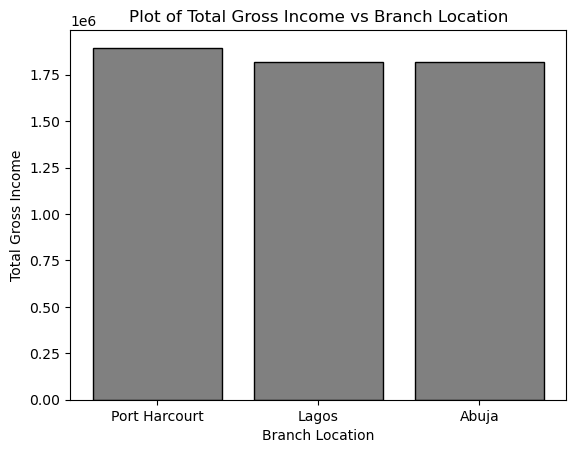

In [ ]:
generate_bar_plot(df_result.index, df_result['gross income'], "Branch Location", "Total Gross Income")
sb.despine()

Result : Portharcourt branch is generating more income than Lagos then Abuja. There isn't much difference in the revenue generation

The reason why we can use what we found during data understanding the data was relatively clean

`2. Branch with highest sales record`

Result  : This has been discovered during data understanding - Lagos has the highest sales record then Abuja then P.H

`3. Most uses Payment method`

Result : This has been discovered during data understanding - Epay, Cash then Card

`4. How do the product line compare in terms of no of items bought`

In [87]:
df_items_bought = comb_df.groupby('Product line')[['Quantity']].sum()

In [89]:
df_items_bought

,Quantity
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


In [91]:
df_items_bought['Quantity Percent'] = (df_items_bought['Quantity'] /sum(df_items_bought['Quantity'])) * 100

In [92]:
df_items_bought

,Quantity,Quantity Percent
Product line,,
Electronic accessories,971,17.622505
Fashion accessories,902,16.370236
Food and beverages,952,17.277677
Health and beauty,854,15.499093
Home and lifestyle,911,16.533575
Sports and travel,920,16.696915


In [94]:
df_result2 = df_items_bought[['Quantity']].sort_values(by='Quantity', ascending=False)

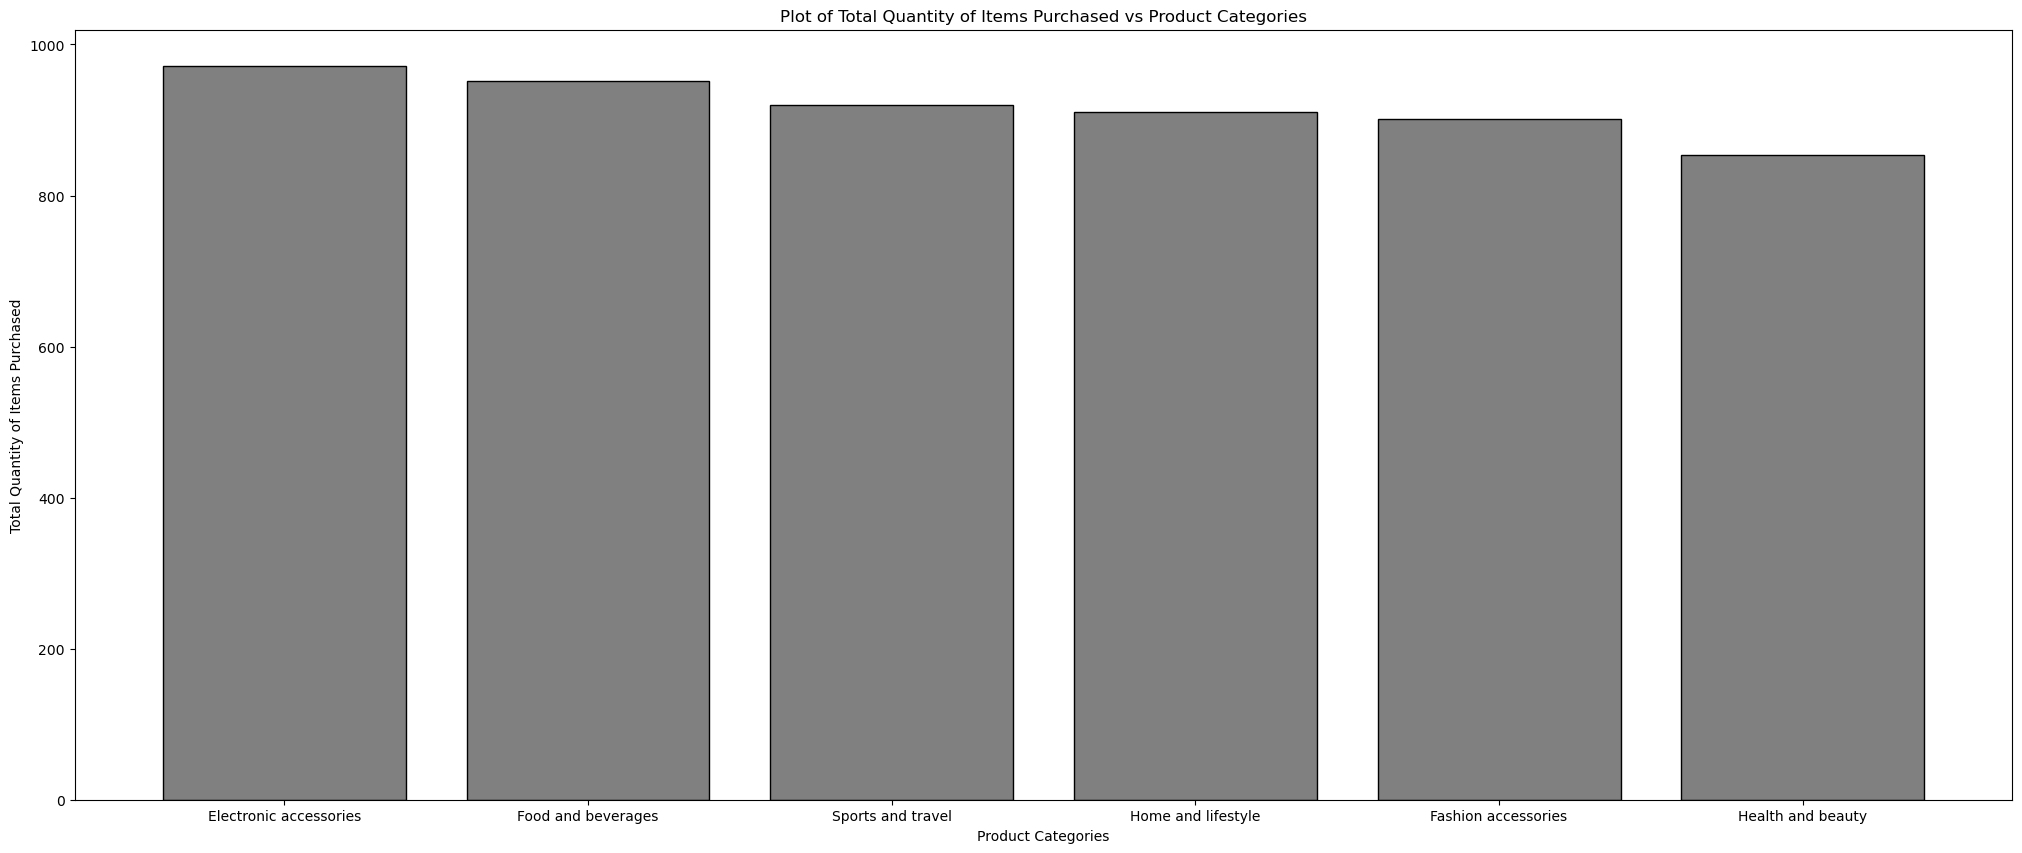

In [97]:
plt.figure(figsize=(25,10))

generate_bar_plot(df_result2.index, df_result2['Quantity'], "Product Categories", "Total Quantity of Items Purchased" )

Result : In terms of quantity of items bought, electronic accessories and Food beverages come tops where health and beauty items are least purchased

`5. Understand the trend of sales across days of the week and month`

In [ ]:
# using time series to analyze sales over time

df_sales_over_time = comb_df.set_index('DateTime').resample('M').agg({'Items Selling Price': 'sum'})

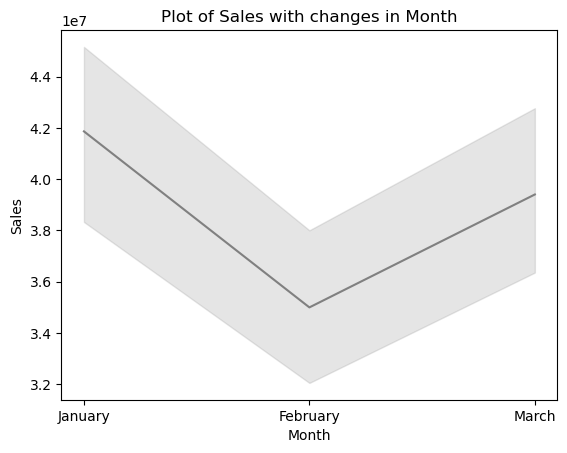

In [115]:
month_mapping = {'January': 1, 'February': 2, 'March': 3}

comb_df['Month_Num'] = comb_df['Month'].map(month_mapping)

generate_line_chart(x='Month', y ='Items Selling Price', xlabel='Month',ylabel='Sales', data=comb_df.sort_values(by='Month_Num'))

Result : The highes sales was recorded in January, there was a decline in February and pick up in March

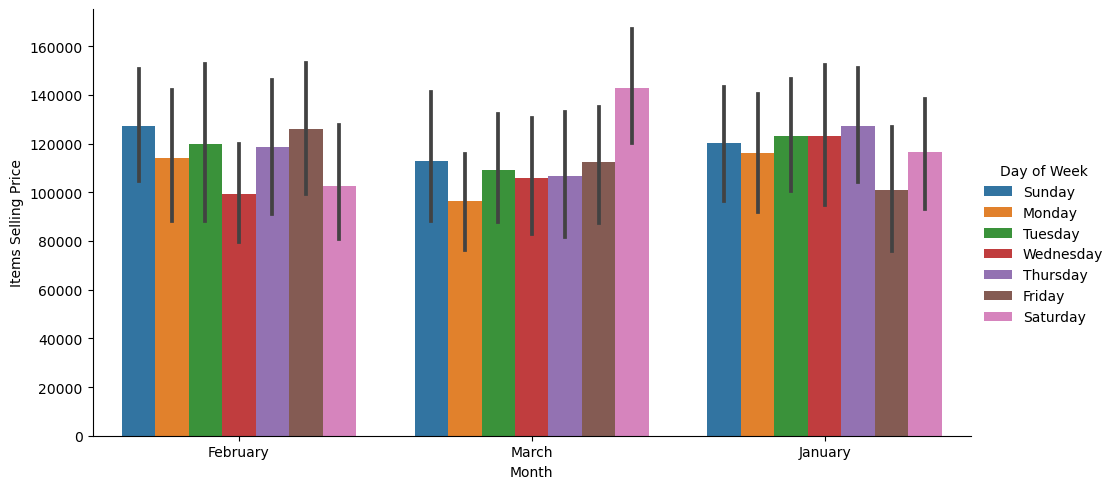

In [124]:
dayOfWeek_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday' : 7}

comb_df['Day_of_week_nos'] = comb_df['Day of Week'].map(dayOfWeek_mapping)

sb.catplot(x='Month', y='Items Selling Price', hue='Day of Week', kind='bar', data=comb_df.sort_values(by='Day_of_week_nos'), height=5, aspect=2)

Result :

 - In the month of January,  Wednesdays, Thursdays and Tuesday are when we generate most sales
 
 - For February, it is  Friday, Sunday and Tuesday. It is obvious that compared to January, the sales were not steady in February.
 
 -  For March, Saturdays were far better in sales compared to the rest, then Sunday and Friday

`6. Customer type for each product line`

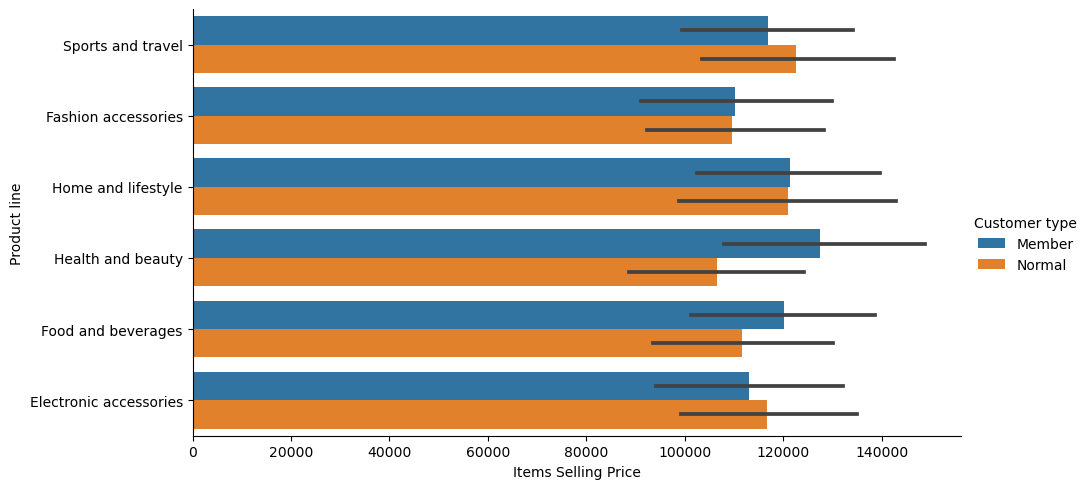

In [126]:
sb.catplot(y='Product line', x='Items Selling Price', hue='Customer type', kind='bar', data=comb_df.sort_values(by='Items Selling Price'), height=5, aspect=2)

Result : 

1. For the following product categories : Sports and travel, health and lifestyle and Electronic accessories, normal customers generate more sales.

2. For the rest , member customers generate more sales. This is more significant for the health and beauty category and less significant for fashion accessories category 

`7. Average Rating for each branch and rating distribution`

In [127]:
df_rating_branch = comb_df.groupby('Branch Location')[['Rating']].mean()

In [128]:
df_rating_branch 

,Rating
Branch Location,
Abuja,6.818072
Lagos,7.027059
Port Harcourt,7.072866


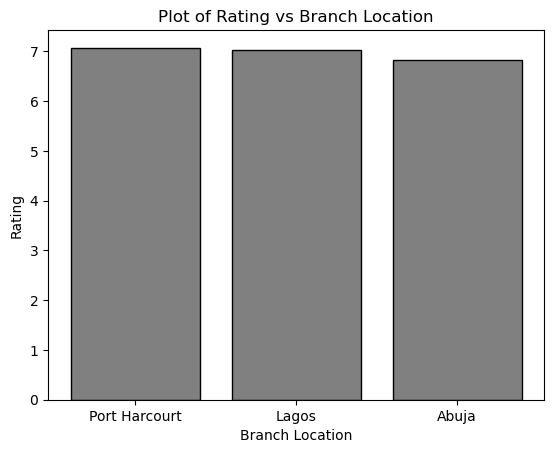

In [130]:
df_rating_branch = df_rating_branch.sort_values(by='Rating', ascending=False)

generate_bar_plot(df_rating_branch.index, df_rating_branch['Rating'], "Branch Location", "Rating" )

Result : PH has the highest rating then Lagos and Abuja.

In [133]:
df_rating_count = comb_df.groupby('Rating Category')[['Rating']].count().sort_values(by='Rating', ascending =False)

In [134]:
df_rating_count

,Rating
Rating Category,
Medium,518
High,308
Low,174


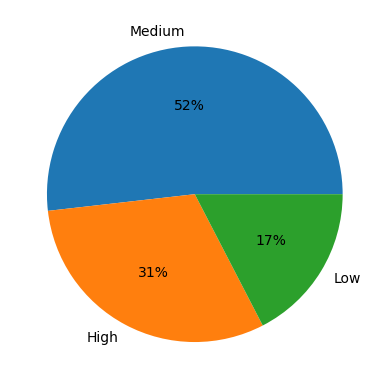

In [136]:
plt.pie(df_rating_count['Rating'], labels=df_rating_count.index, autopct='%.0f%%')
plt.show()

Result : There are more medium ratings then high and low.

8 `Payment Channel For each branch`

Text(0.5, 1.0, 'How Sales compare to Branch across payment channels')

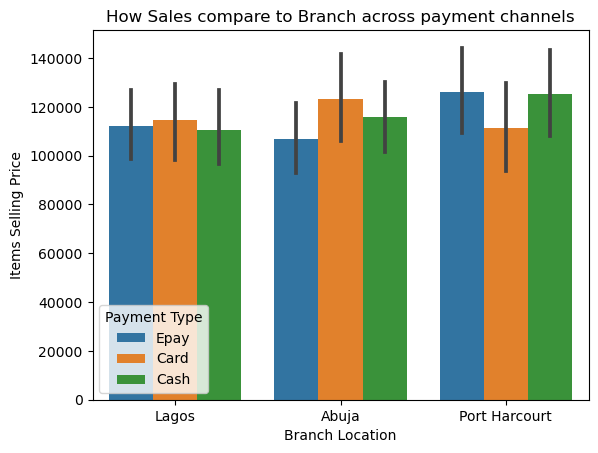

In [140]:
sb.barplot(x='Branch Location', y='Items Selling Price', hue='Payment Type', data=comb_df)
plt.title('How Sales compare to Branch across payment channels')

Result : 

1. All 3 payment channels are used almost equally in Lagos

2. Card is the most popular method in Abuja then Cash and Epay

3. In PH, it is Epay then cash and card.

` 9. How Gender compare to product line`

Text(0.5, 1.0, 'How Sales compare to Product Line across gender types')

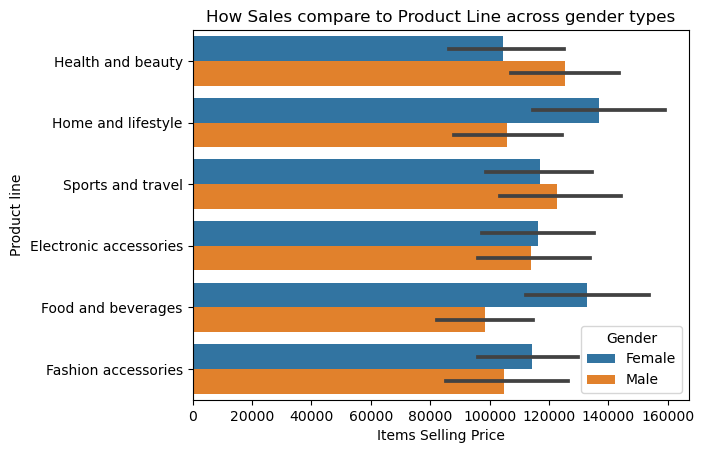

In [142]:
sb.barplot(y='Product line', x='Items Selling Price', hue='Gender', data=comb_df)
plt.title('How Sales compare to Product Line across gender types')

`10. What hour of the day is the busiest`

In [143]:
comb_df['Hour'] = comb_df['DateTime'].dt.hour

In [144]:
df_sales_by_hr = comb_df.groupby('Hour')[['Quantity']].sum().sort_values(by="Quantity", ascending=False)

In [145]:
df_sales_by_hr

,Quantity
Hour,
19,649
13,585
15,530
10,525
11,513
12,501
14,495
18,475
16,420


In [146]:
hour_mapping = {
    0: "12 AM", 1: "1 AM", 2: "2 AM", 3: "3 AM", 4: "4 AM", 5: "5 AM", 6: "6 AM", 7: "7 AM", 8: "8 AM", 9: "9 AM", 10: "10 AM", 11: "11 AM",
    12: "12 PM", 13: "1 PM", 14: "2 PM", 15: "3 PM", 16: "4 PM", 17: "5 PM", 18: "6 PM", 19: "7 PM", 20: "8 PM", 21: "9 PM", 22: "10 PM", 23: "11 PM"
}

df_sales_by_hr.index = df_sales_by_hr.index.map(hour_mapping)

df_sales_by_hr

,Quantity
Hour,
7 PM,649
1 PM,585
3 PM,530
10 AM,525
11 AM,513
12 PM,501
2 PM,495
6 PM,475
4 PM,420


Result : The busiest hours are 7pm , 1pm and 3pm respectively

`11. Busiest hour by location/branch`

In [159]:


comb_df['Hour Label'] = comb_df['Hour'].map(hour_mapping)

agg_data = comb_df.groupby(['Hour Label', 'Branch Location'], as_index=False)['Quantity'].sum()

agg_data.head()

,Hour Label,Branch Location,Quantity
0,1 PM,Abuja,201
1,1 PM,Lagos,183
2,1 PM,Port Harcourt,201
3,10 AM,Abuja,152
4,10 AM,Lagos,192


Text(0.5, 1.0, 'Quantity Sold by Hour and Branch Location')

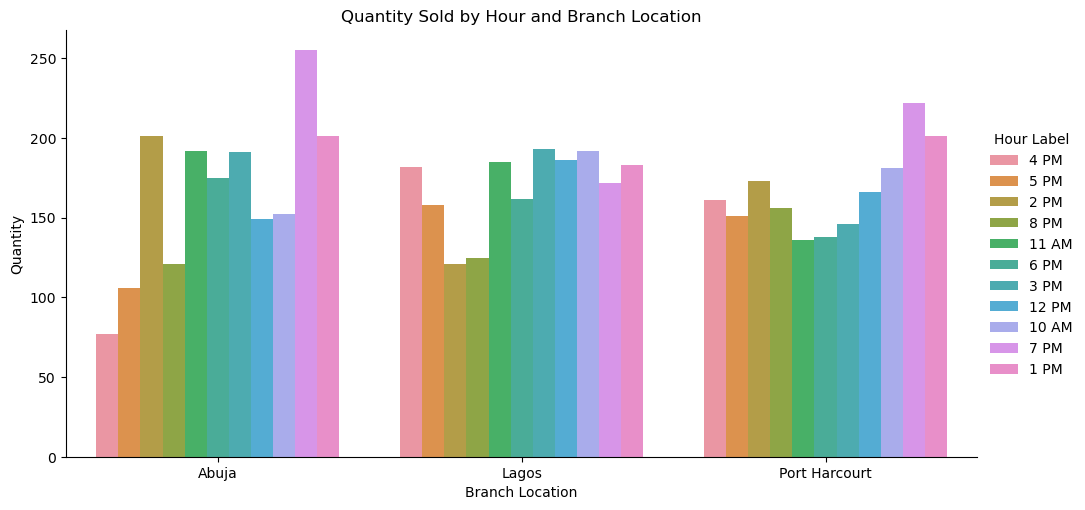

In [164]:
sb.catplot(x='Branch Location', y='Quantity', hue='Hour Label', kind='bar', data=agg_data.sort_values(by='Quantity'), height=5, aspect=2)
plt.title('Quantity Sold by Hour and Branch Location')

Result :

1. In Abuja, 7pm, 1pm and 2pm are the busiest. 7pm is an extremely busy time

2. In Lagos, 3pm, 10am and 11am are the busiest

3. In PH, 7pm , 1pm and 10am are the busiest

`12. Rating category distribution in each location`

In [167]:
agg_data = comb_df.groupby(['Rating Category', 'Branch Location'], as_index=False)['Rating'].count()

agg_data

,Rating Category,Branch Location,Rating
0,High,Abuja,89
1,High,Lagos,106
2,High,Port Harcourt,113
3,Low,Abuja,66
4,Low,Lagos,60
5,Low,Port Harcourt,48
6,Medium,Abuja,177
7,Medium,Lagos,174
8,Medium,Port Harcourt,167


Text(0.5, 1.0, 'Rating Category Distribution')

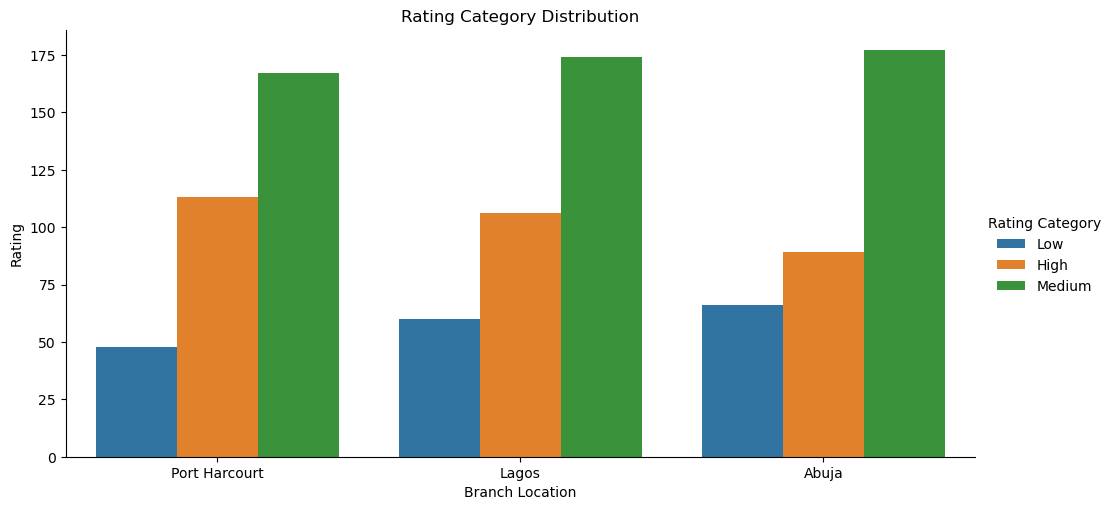

In [168]:
sb.catplot(x='Branch Location', y='Rating', hue='Rating Category', kind='bar', data=agg_data.sort_values(by='Rating'), height=5, aspect=2)
plt.title('Rating Category Distribution')

Result : 

1. PH Has the lowest low rating , Abuja has the highest low rating

#### Conclusion

The following insights were drawn from analyzing the data:

- Portharcourt branch is generating more income than Lagos then Abuja. There isn't much difference in the revenue generation for the 3 branches.

- In order of usage, the most popular payment methods are Epay, Cash then Card

- In terms of quantity of items bought, electronic accessories and Food beverages come tops where health and beauty items are least purchased

- Over the course of the 3 month period, the highest sales was recorded in January, there was a decline in February and pick up in March

- A further drill down on sales trend indicated that :

  - In the month of January,  Wednesdays, Thursdays and Tuesday are when we generate most sales
 
  - For February, it is  Friday, Sunday and Tuesday. It is obvious that compared to January, the sales were not steady in February.
 
  -  For March, Saturdays were far better in sales compared to the rest, then Sunday and Friday


- In understading the impact of customer type on product line, it was found that for the following product categories : Sports and travel, health and lifestyle and Electronic accessories, normal customers generate more sales.

  For the rest , member customers generate more sales. This is more significant for the health and beauty category and less significant for fashion accessories category 

- Overall for the course of the 3 month period, PH has the highest rating then Lagos and Abuja.

- A futher drill down on rating shows that there are more medium ratings (52%) then high (31%) and low (17%) and PH has the   highest low rating (48) while Abuja has the highest low rating (66)

 The ratings have been categorised using the keys below:

     < 5 : Low
     5 <=> 8 : Medium 
     > 8 : High

- In understanding payment channels used in each branch, it was found that:

    - All 3 payment channels are used almost equally in Lagos

    - Card is the most popular method in Abuja then Cash and Epay

    - In PH, it is Epay then cash and card.

- For comparing product line to gender, it was discovered that :

    - More females purchase items from these product lines: home and lifestyle, fashion accessories and food and beverages.

    - More males purchase items in the categories: Sport and travel and health and beauty.

- Overall, the busiest hours are 7pm , 1pm and 3pm respectively

- A further drill down per location:
    - In Abuja, 7pm, 1pm and 2pm are the busiest. 7pm is an extremely busy time

    - In Lagos, 3pm, 10am and 11am are the busiest

    - In PH, 7pm , 1pm and 10am are the busiest